# Objective

Welcome to the notebook, In this notebook, we will analyze the Open sourcing mental illness survey in the year between 2016-2019. (basically, this is a survey for employers to know about how much they aware about mental illness) . The main objective of this notebook is to know what are the main reasons for mental illness, how many employees are suffering from mental illness, and what employees think about mental illness, do they share their mental illness problems with others or not. Role of companies and employers in mental illness dose they support mental illness in companies or not and many more interesting things

In [1]:
# importing required libraries 
import pandas as pd
import sqlite3
import tqdm
import itertools
import numpy as np
from scipy import stats
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [2]:
dataset = pd.read_csv('Mentall_illness_dataset.csv',index_col='user_id')
dataset.drop('Unnamed: 0',axis=1,inplace = True)
dataset.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q110,Q111,Q112,Q113,Q114,Q115,Q116,Q117,Q118,survey_id
user_id,,,,,,,,,,,,,,,,,,,,,
1,37.0,Female,United States,Illinois,NaN,No,1,6-25,1.0,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014
2,44.0,Male,United States,Indiana,NaN,No,0,More than 1000,0.0,Don't know,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014
3,32.0,Male,Canada,NaN,NaN,No,0,6-25,1.0,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014
4,31.0,Male,United Kingdom,NaN,NaN,Yes,1,26-100,1.0,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014
5,31.0,Male,United States,Texas,NaN,No,0,100-500,1.0,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014


##### NOTE:This data frame is created by combining the 3 tables in SQLite databases so that it is easy to get information about a particular user(employee)

By seeing the data frame many values are Not_avaliable, they are missing values we have to replace them with the null values and some values have -1 which means no entry so we have to replace them also 

In [3]:
dataset.replace('Not_avaliable',np.nan,inplace=True)
dataset.replace('-1',np.nan,inplace=True)

Now let's start Analysis

Text(0.5, 0, 'age')

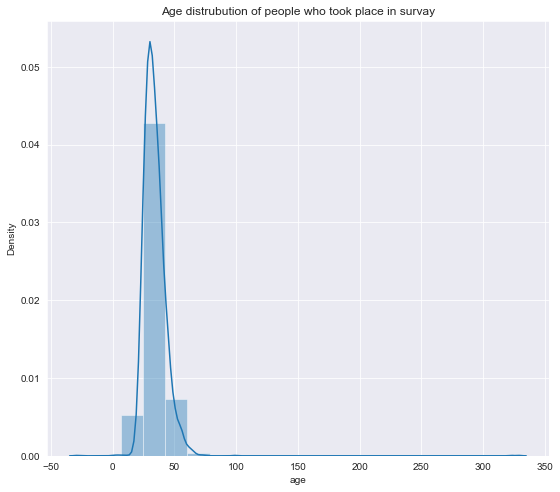

In [4]:
#Age distrubution plot
plt.figure(figsize=(9, 8))
sns.set_style('darkgrid')
ax = sns.distplot(dataset['Q1'],bins=20)
ax.set_title("Age distrubution of people who took place in survay")
ax.set_xlabel("age")

In [5]:
dataset['Q1'].unique()

array([ 37.,  44.,  32.,  31.,  33.,  35.,  39.,  42.,  23.,  29.,  36.,
        27.,  46.,  41.,  34.,  30.,  40.,  38.,  50.,  24.,  18.,  28.,
        26.,  22.,  19.,  25.,  45.,  21., -29.,  43.,  56.,  60.,  54.,
       329.,  55.,  nan,  48.,  20.,  57.,  58.,  47.,  62.,  51.,  65.,
        49.,   5.,  53.,  61.,   8.,  11.,  72.,  52.,  17.,  63.,  99.,
       323.,   3.,  66.,  59.,  15.,  74.,  70.,  64.,  67.,   0.])

 oho there are many outliers in the Age column this may not look good in the graph, so we will remove outliers

In [6]:
Lower_quntail = dataset["Q1"].quantile(0.01)
upper_quntail  = dataset["Q1"].quantile(0.99)
df = dataset[(dataset["Q1"] < upper_quntail) & (dataset["Q1"] > Lower_quntail)]
df['Q1'].unique()

array([37., 44., 32., 31., 33., 35., 39., 42., 23., 29., 36., 27., 46.,
       41., 34., 30., 40., 38., 50., 24., 28., 26., 22., 25., 45., 21.,
       43., 56., 54., 55., 48., 57., 47., 51., 49., 53., 52.])

Text(0.5, 0, 'age')

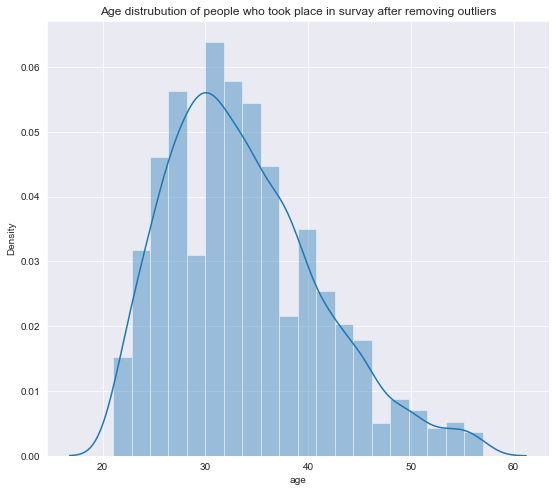

In [7]:
plt.figure(figsize=(9, 8))
sns.set_style('darkgrid')
ax = sns.distplot(df['Q1'],bins=20)
ax.set_title("Age distrubution of people who took place in survay after removing outliers")
ax.set_xlabel("age")

Now it looks good, employees between 30-40 years old are more in this survey

Text(0, 0.5, 'Mental_illness')

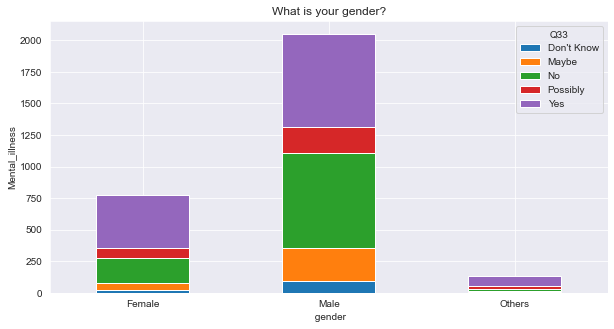

In [11]:
# Gender distrubution of people
ax =  dataset.groupby('Q33').Q2.value_counts().unstack(0).plot.bar(stacked=True,rot=0,title = 'What is your gender?')
ax.set_xlabel(" gender")
ax.set_ylabel("Mental_illness")

Mental illness is more in Male compared to females

Text(0, 0.5, 'Mental_illness')

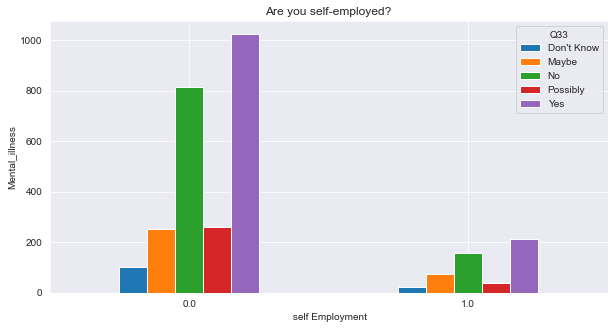

In [10]:
#let's see how mental illness vary with employed and self-employed people
#self employmnet
plt.rcParams["figure.figsize"] = [10, 5]
ax = dataset.groupby('Q33').Q5.value_counts().unstack(0).plot.bar(rot=0,title='Are you self-employed?')
ax.set_xlabel(" self Employment")
ax.set_ylabel("Mental_illness")

We can see employed people(who are working under somebody) are affected more than self-employed people, maybe is this is because of work pressure, deadlines or maybe any other factor

Text(0, 0.5, 'count')

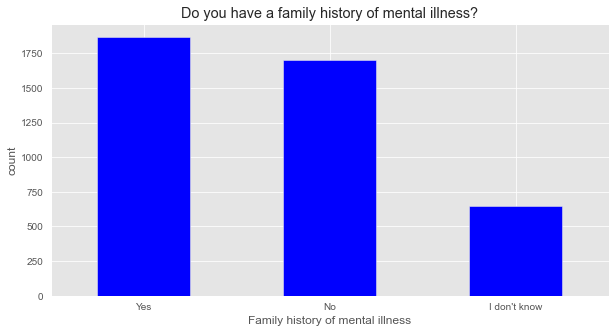

In [179]:
#family history
plt.figure(figsize=(10,5))
ax = dataset['Q6'].value_counts().plot.bar(x='lab', y='val', rot=0,color = 'b',title = 'Do you have a family history of mental illness?')
ax.set_xlabel("Family history of mental illness")
ax.set_ylabel("count")

This graph is about to know how many employees are having a family background of mental illness, which means anybody in their family is suffering from mental illness

Text(0, 0.5, 'Mental illness')

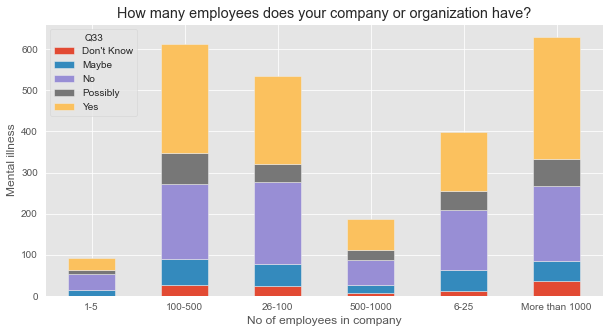

In [12]:
#Does the number of employees in a company affects mental illness
matplotlib.style.use('ggplot')
ax = dataset.groupby('Q33').Q8.value_counts().unstack(0).plot.bar(stacked=True,rot=0,title = 'How many employees does your company or organization have?')
ax.set_xlabel("No of employees in company")
ax.set_ylabel("Mental illness")

It seems to be there is no effect on mental illness with the number of employees in a company

Text(0, 0.5, 'Mental illness')

<Figure size 720x360 with 0 Axes>

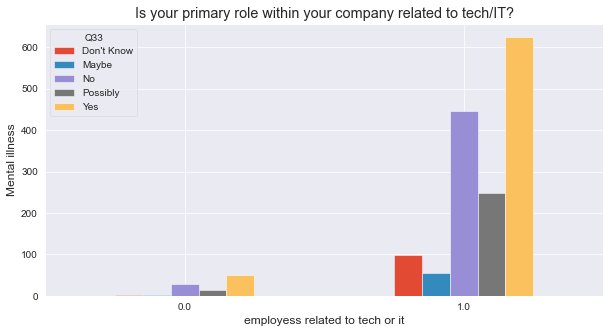

In [176]:
#employess tech/it
plt.figure(figsize=(10,5))
ax =dataset.groupby('Q33').Q13.value_counts().unstack(0).plot.bar(rot=0,title = 'Is your primary role within your company related to tech/IT?')
ax.set_xlabel("employess related to tech or it")
ax.set_ylabel("Mental illness")

People who are suffering from mental illness 92% people belong to the tech industry 

Text(0, 0.5, 'count')

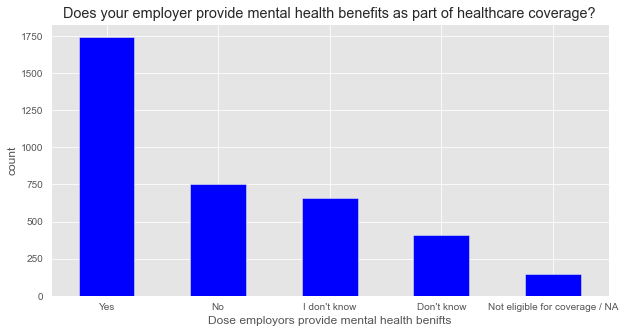

In [16]:
#employors provide mental health benifts
plt.figure(figsize=(10,5))
ax = dataset['Q10'].value_counts().plot.bar(x='lab', y='val', rot=0,color = 'b',title = 'Does your employer provide mental health benefits as part of healthcare coverage?')
ax.set_xlabel("Dose employors provide mental health benifts")
ax.set_ylabel("count")

This plot is to know about how many employers are providing mental health benefits as part of health care coverage in tech industries, and most of the employers are giving benefits

Text(0, 0.5, 'mental illness')

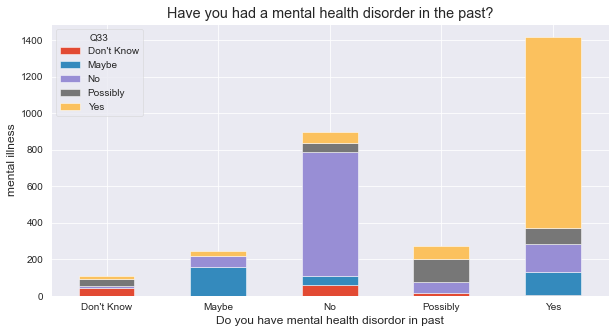

In [174]:
ax = dataset.groupby('Q33').Q32.value_counts().unstack(0).plot.bar(rot=0,stacked = True,title = 'Have you had a mental health disorder in the past?')
ax.set_xlabel("Do you have mental health disordor in past")
ax.set_ylabel("mental illness")

Here we came to know that most of the employees having a mental illness in past are suffering at present also, this says that they are not recovered from mental illness 

Text(0, 0.5, 'count')

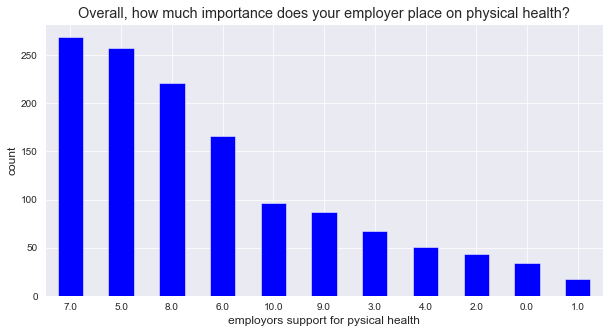

In [173]:
#employor for pysical health 
plt.figure(figsize=(10,5))
ax = dataset['Q64'].value_counts().plot.bar(x='lab', y='val', rot=0,color = 'b',title = 'Overall, how much importance does your employer place on physical health?')
ax.set_xlabel("employors support for pysical health")
ax.set_ylabel("count")

In [111]:
dataset['Q64'].mean()

6.25611620795107

Employors supports an average score of 6 to employess for pysical health

Text(0, 0.5, 'count')

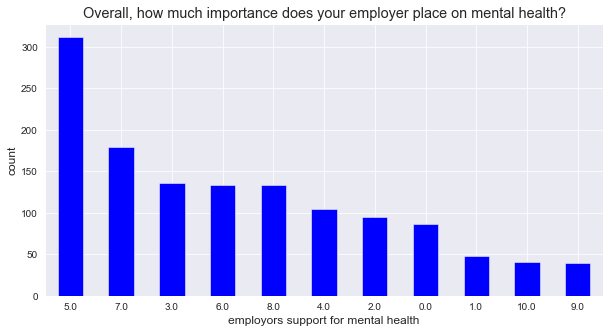

In [172]:
#for mental heamean
plt.figure(figsize=(10,5))
ax = dataset['Q65'].value_counts().plot.bar(x='lab', y='val', rot=0,color = 'b',title = 'Overall, how much importance does your employer place on mental health?')
ax.set_xlabel("employors support for mental health")
ax.set_ylabel("count")

In [112]:
dataset['Q65'].mean()

4.974770642201835

Employers support an average score of 6 to employees for mental health, we can see that support towards mental health is less compares to the physical health

Text(0, 0.5, 'count')

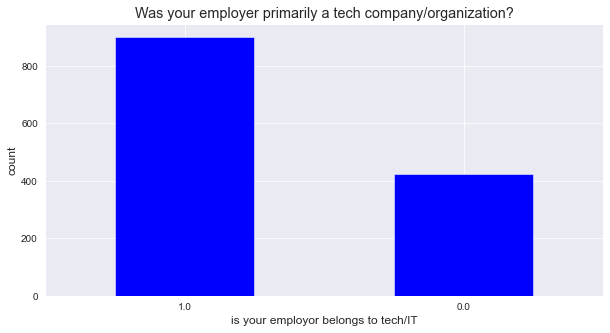

In [171]:
#employor tech\it
plt.figure(figsize=(10,5))
ax = dataset['Q68'].value_counts().plot.bar(x='lab', y='val', rot=0,color = 'b',title = 'Was your employer primarily a tech company/organization?')
ax.set_xlabel("is your employor belongs to tech/IT")
ax.set_ylabel("count")

more than 60% of the employors belong to the tech/IT feild

Text(0, 0.5, 'count')

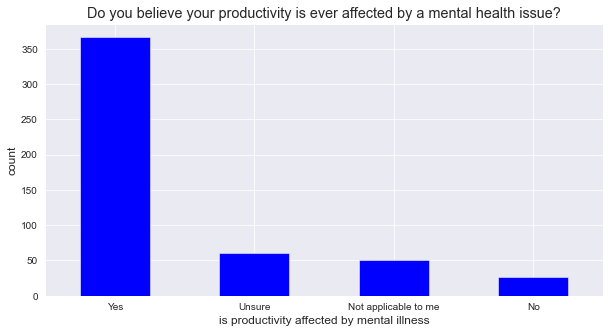

In [170]:
#productivity
plt.figure(figsize=(10,5))
ax = dataset['Q54'].value_counts().plot.bar(x='lab', y='val', rot=0,color = 'b',title = 'Do you believe your productivity is ever affected by a mental health issue?')
ax.set_xlabel("is productivity affected by mental illness")
ax.set_ylabel("count")

More than 65% employees in the survey things that there productivity of the work  is affected by mental illness 

Text(0, 0.5, 'count')

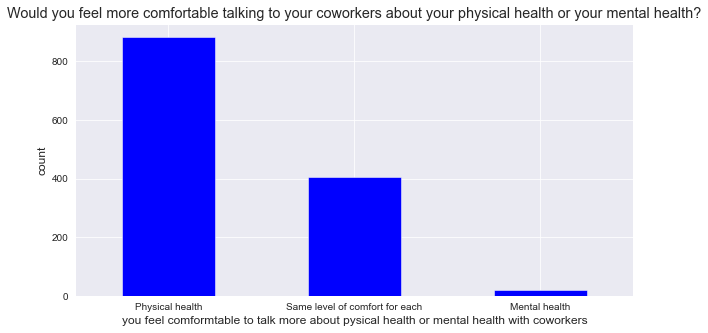

In [169]:
#Would you feel more comfortable talking to your coworkers about your physical health or your mental health?
plt.figure(figsize=(10,5))
ax = dataset['Q57'].value_counts().plot.bar(x='lab', y='val', rot=0,color = 'b',title = 'Would you feel more comfortable talking to your coworkers about your physical health or your mental health?')
ax.set_xlabel("you feel comformtable to talk more about pysical health or mental health with coworkers")
ax.set_ylabel("count")

Empolyess are not comfortable to talk about mental illness

Text(0, 0.5, 'count')

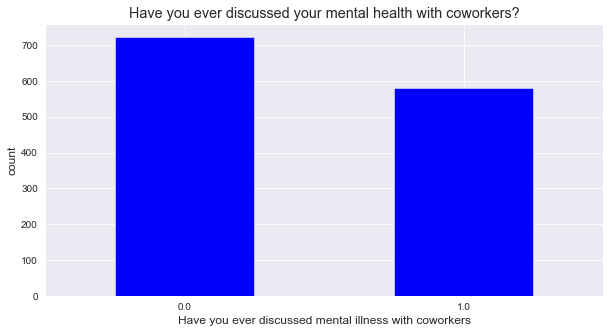

In [168]:
# 3 have u ever discussed mental illnes with coworkers
plt.figure(figsize=(10,5))
ax = dataset['Q60'].value_counts().plot.bar(x='lab', y='val', rot=0,color = 'b',title = 'Have you ever discussed your mental health with coworkers?')
ax.set_xlabel("Have you ever discussed mental illness with coworkers")
ax.set_ylabel("count")

People are hesitating to talk about there mental illness with their mental issues

Text(0, 0.5, 'count')

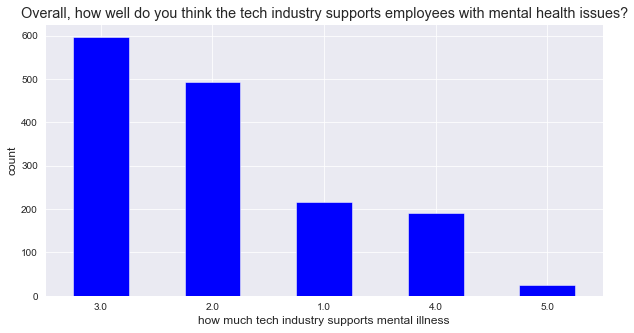

In [167]:
# how much tech industry supports mental illness
plt.figure(figsize=(10,5))
ax = dataset['Q85'].value_counts().plot.bar(x='lab', y='val', rot=0,color = 'b',title= 'Overall, how well do you think the tech industry supports employees with mental health issues?')
ax.set_xlabel("how much tech industry supports mental illness")
ax.set_ylabel("count")

In [116]:
dataset['Q85'].mean()

2.5476034143138544

Tech industry scores 2.5 stars out of 5 by supporting Mental illness

Text(0, 0.5, 'count')

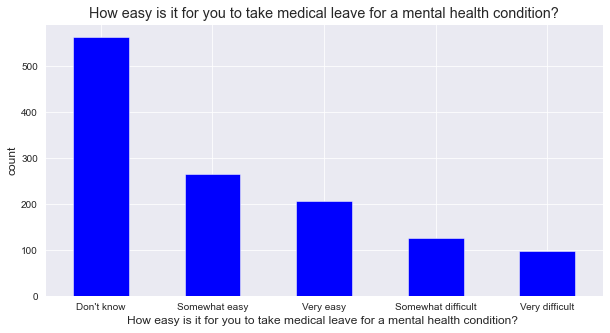

In [166]:
# taking leave in comapanies
plt.figure(figsize=(10,5))
ax = dataset['Q97'].value_counts().plot.bar(x='lab', y='val', rot=0,color = 'b',title = 'How easy is it for you to take medical leave for a mental health condition?')
ax.set_xlabel("How easy is it for you to take medical leave for a mental health condition? ")
ax.set_ylabel("count")

most of the employess says its easy to take medical leave for a mental health condition in companies 